# 10-year Portfolio Returs Simulation for Current Top 10 Stocks in S&P 500 Index and Bond ETF
## 40% in in AAPL,MSFT, AMZN, FB, GOOG, GOOGL, BRK.B, JNJ, PG, NVDA (5% each)
## 60% in BND ETF


## Import Dependencies

In [1]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

## Load Environment Variables and Set Up Alpaca Environment

In [2]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

## Get Past 5 Year's Worth of Stock Price Data via Alpaca API Call

In [4]:
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 5 years ago.
start_date = pd.Timestamp("2015-11-02", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-11-02", tz="America/New_York").isoformat()

# Set the ticker information
tickers = ["AAPL","MSFT", "AMZN", "FB", "GOOG", "GOOGL","BRK.B", "JNJ", "PG", "NVDA", "BND"]

# Get 5 year's worth of historical price data
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_ticker.head()

AAPL                                      AMZN  \
                             open    high     low   close    volume    open   
2015-11-02 00:00:00-05:00  119.87  121.36  119.61  121.19  28020028  627.13   
2015-11-03 00:00:00-05:00  120.79  123.49  120.70  122.59  39175176  629.53   
2015-11-04 00:00:00-05:00  123.13  123.82  121.62  121.95  37086643  628.08   
2015-11-05 00:00:00-05:00  121.85  122.69  120.18  120.91  33022644  647.10   
2015-11-06 00:00:00-05:00  121.11  121.81  120.62  121.06  27916777  655.00   

                                                              ...   NVDA  \
                             high       low   close   volume  ...   open   
2015-11-02 00:00:00-05:00  628.63  620.4100  628.35  2045602  ...  28.46   
2015-11-03 00:00:00-05:00  629.89  622.0000  625.32  2261478  ...  28.53   
2015-11-04 00:00:00-05:00  645.93  627.3500  641.17  3636259  ...  28.49   
2015-11-05 00:00:00-05:00  657.00  643.0901  655.76  3636565  ...  28.17   
2015-11-06 00:00:00-05:00  662.26  652.0000  659.38  3033991  ...  30.45   

                                                              PG         \
                             high    low  close    volume   open   high   
2015-11-02 00:00:00-05:00  28.730  28.29  28.70   3938295  76.57  76.77   
2015-11-03 00:00:00-05:00  28.690  28.18  28.49   7902945  76.30  77.42   
2015-11-04 00:00:00-05:00  28.630  27.90  28.03   9845373  77.03  77.14   
2015-11-05 00:00:00-05:00  28.245  27.63  27.70   9809572  77.09  77.26   
2015-11-06 00:00:00-05:00  31.940  29.82  31.54  24445889  75.88  76.00   

                                                   
                              low  close   volume  
2015-11-02 00:00:00-05:00  76.050  76.59  5957768  
2015-11-03 00:00:00-05:00  75.960  77.07  6835155  
2015-11-04 00:00:00-05:00  76.509  77.08  5065834  
2015-11-05 00:00:00-05:00  75.960  76.43  5705284  
2015-11-06 00:00:00-05:00  74.695  75.57  8270094  

[5 rows x 55 columns]

## Simulate five year portfolio growth with evenly-distributed stock investments:
## Configure the Instance of MCSimulation

In [5]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.04,.04,.04,.04,.04,.04,.04,.04,.04,.04,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

# Print the simulation input data
MC_even_dist.portfolio_data.head()

AAPL                                    \
                             open    high     low   close    volume   
2015-11-02 00:00:00-05:00  119.87  121.36  119.61  121.19  28020028   
2015-11-03 00:00:00-05:00  120.79  123.49  120.70  122.59  39175176   
2015-11-04 00:00:00-05:00  123.13  123.82  121.62  121.95  37086643   
2015-11-05 00:00:00-05:00  121.85  122.69  120.18  120.91  33022644   
2015-11-06 00:00:00-05:00  121.11  121.81  120.62  121.06  27916777   

                                          AMZN                            ...  \
                          daily_return    open    high       low   close  ...   
2015-11-02 00:00:00-05:00          NaN  627.13  628.63  620.4100  628.35  ...   
2015-11-03 00:00:00-05:00     0.011552  629.53  629.89  622.0000  625.32  ...   
2015-11-04 00:00:00-05:00    -0.005221  628.08  645.93  627.3500  641.17  ...   
2015-11-05 00:00:00-05:00    -0.008528  647.10  657.00  643.0901  655.76  ...   
2015-11-06 00:00:00-05:00     0.001241  655.00  662.26  652.0000  659.38  ...   

                            NVDA                                   PG         \
                             low  close    volume daily_return   open   high   
2015-11-02 00:00:00-05:00  28.29  28.70   3938295          NaN  76.57  76.77   
2015-11-03 00:00:00-05:00  28.18  28.49   7902945    -0.007317  76.30  77.42   
2015-11-04 00:00:00-05:00  27.90  28.03   9845373    -0.016146  77.03  77.14   
2015-11-05 00:00:00-05:00  27.63  27.70   9809572    -0.011773  77.09  77.26   
2015-11-06 00:00:00-05:00  29.82  31.54  24445889     0.138628  75.88  76.00   

                                                                
                              low  close   volume daily_return  
2015-11-02 00:00:00-05:00  76.050  76.59  5957768          NaN  
2015-11-03 00:00:00-05:00  75.960  77.07  6835155     0.006267  
2015-11-04 00:00:00-05:00  76.509  77.08  5065834     0.000130  
2015-11-05 00:00:00-05:00  75.960  76.43  5705284    -0.008433  
2015-11-06 00:00:00-05:00  74.695  75.57  8270094    -0.011252  

[5 rows x 66 columns]

## Run the Monte Carlo Simulation

In [6]:
# Run a Monte Carlo simulation to forecast five years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.018072,1.002650,0.997503,1.002561,0.989497,0.996197,0.999978,1.003648,1.008888,1.000381,...,1.004582,0.998843,1.000176,0.999042,1.015286,1.008270,1.003172,1.004127,0.997626,0.993997
2,1.012022,1.016461,1.004961,1.030124,0.995795,0.997438,0.989644,1.009052,1.004321,1.002409,...,1.005843,0.997941,1.008651,0.988585,1.011710,1.017551,1.013390,1.013930,0.995347,0.984665
3,1.019341,1.022463,0.999054,1.027300,0.987566,1.011833,0.990780,1.017679,1.001681,1.003733,...,1.007468,0.993665,0.997231,0.987159,1.015999,1.016745,1.026832,1.008667,1.015542,0.986380
4,1.014237,1.030278,0.996495,1.006298,0.987658,1.006889,0.986623,1.020912,1.003116,1.010869,...,1.002024,0.981312,1.000843,0.990080,1.015774,1.021250,1.040679,1.021868,1.010227,0.979139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,11.578755,5.574036,3.648052,5.351543,7.777457,5.492261,7.128183,5.230840,3.094726,2.891480,...,10.524513,5.393784,8.115042,7.584393,7.852966,6.014651,14.527400,6.017631,5.834993,6.382391
2517,11.541394,5.560573,3.704791,5.337856,7.717156,5.554978,7.134829,5.287418,3.132884,2.869204,...,10.546900,5.403311,8.202992,7.648348,7.830006,5.981977,14.580038,6.055179,5.856815,6.389144
2518,11.545901,5.606513,3.707352,5.341651,7.757155,5.559304,7.100971,5.336705,3.150590,2.857591,...,10.632027,5.440736,8.291362,7.703855,7.822163,6.009988,14.406042,6.085922,5.789842,6.328437
2519,11.559171,5.629925,3.726540,5.460653,7.795201,5.546523,7.112485,5.347425,3.167090,2.828914,...,10.738392,5.427120,8.331177,7.756793,7.743024,5.957630,14.283410,6.155885,5.796922,6.230390


## Visualize the Results

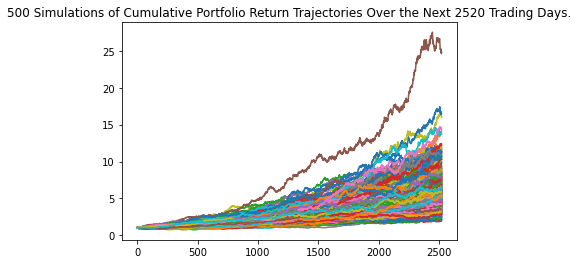

In [7]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

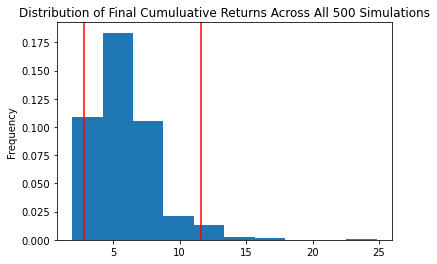

In [8]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

In [9]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean              5.890729
std               2.425574
min               1.927451
25%               4.214693
50%               5.429174
75%               7.029608
max              24.812883
95% CI Lower      2.787203
95% CI Upper     11.634921
Name: 2520, dtype: float64


##  Determine Upper and Lower Confidence Intervals

In [10]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments in stocks
even_ci_lower = round(even_tbl[8]*15000,2)
even_ci_upper = round(even_tbl[9]*15000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")

There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 5 years will end within in the range of $41808.05 and $174523.82.


## Create a new DataFrame to hold the summary statistics for the simulated daily returns.

In [11]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(MC_even_dist.simulated_return.mean(axis=1)),
    "median": list(MC_even_dist.simulated_return.median(axis=1)),
    "min": list(MC_even_dist.simulated_return.min(axis=1)),
    "max": list(MC_even_dist.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.001146,1.000924,0.976999,1.027670
2,1.002079,1.001919,0.969754,1.037640
3,1.002766,1.002796,0.962735,1.050838
4,1.003205,1.003136,0.958764,1.047711


## Generate a line plot to visualize the summary statistics for the simulated daily returns

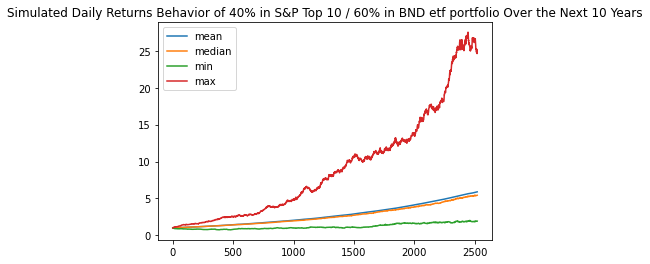

In [12]:
# Use the `plot` function to visually analyze the trajectory of TSLA stock daily returns on the next three years of trading days simulation
df_simulated_returns.plot(title="Simulated Daily Returns Behavior of 40% in S&P Top 10 / 60% in BND etf portfolio Over the Next 10 Years")

## Create a new DataFrame to hold the summary statistics for the simulated daily returns assuming an initial investment of $10,000

In [13]:
# Set initial investment
initial_investment = 10000

# Multiply an initial investment by the daily returns of simulated stock prices to return the progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_returns

# Display sample data
cumulative_pnl.head()

,mean,median,min,max
0,10000.000000,10000.000000,10000.000000,10000.000000
1,10011.460232,10009.243933,9769.989183,10276.702861
2,10020.787862,10019.193923,9697.537409,10376.400601
3,10027.656567,10027.959600,9627.353335,10508.377138
4,10032.051025,10031.358232,9587.644372,10477.111304


## Generate a line plot to visualize the updated summary statistics for simulated daily returns using a $10,000 initial investment

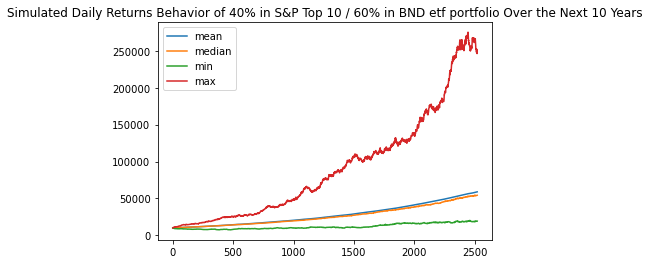

In [14]:
# Use the 'plot' function to create a chart of the simulated profits/losses
cumulative_pnl.plot(title="Simulated Daily Returns Behavior of 40% in S&P Top 10 / 60% in BND etf portfolio Over the Next 10 Years")

## Calculate the range of possible outcomes for our $10,000 investment with a 95% confidence interval

In [15]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              5.890729
std               2.425574
min               1.927451
25%               4.214693
50%               5.429174
75%               7.029608
max              24.812883
95% CI Lower      2.787203
95% CI Upper     11.634921
Name: 2520, dtype: float64


In [16]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in TSLA stocks
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next year will end within in the range of $27872.03 and $116349.21.


## Create a new DataFrame to hold the summary statistics for the simulated MEAN daily returns.

In [17]:
# Compute summary statistics from the simulated daily returns
simulated_MEAN_returns_data = {
    "mean": list(MC_even_dist.simulated_return.mean(axis=1)),
}

# Create a DataFrame with the summary statistics
df_simulated_MEAN_returns = pd.DataFrame(simulated_MEAN_returns_data)

# Display sample data
df_simulated_MEAN_returns.head()

,mean
0,1.000000
1,1.001146
2,1.002079
3,1.002766
4,1.003205


## Generate a line plot to visualize the summary statistics for the simulated MEAN daily returns

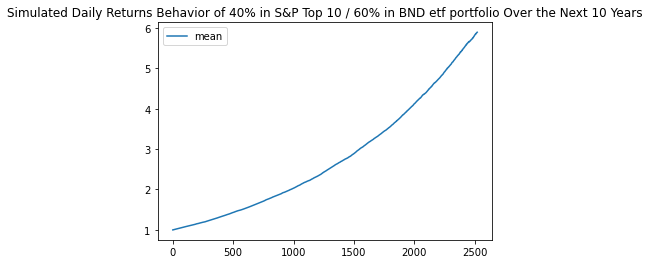

In [18]:
# Use the `plot` function to visually analyze the trajectory of TSLA stock daily returns on the next three years of trading days simulation
df_simulated_MEAN_returns.plot(title="Simulated Daily Returns Behavior of 40% in S&P Top 10 / 60% in BND etf portfolio Over the Next 10 Years")

## Create a new DataFrame to hold the summary statistics for the simulated daily returns assuming an initial investment of $10,000¶

In [19]:
# Set initial investment
initial_investment = 10000

# Multiply an initial investment by the daily returns of simulated stock prices to return the progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_MEAN_returns

# Display sample data
cumulative_pnl.head()

,mean
0,10000.000000
1,10011.460232
2,10020.787862
3,10027.656567
4,10032.051025


## Generate a line plot to visualize the updated summary statistics for simulated daily returns using a $10,000 initial investment

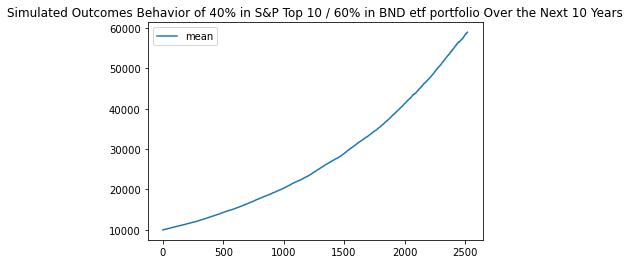

In [20]:
# Use the 'plot' function to create a chart of the simulated profits/losses
cumulative_pnl.plot(title="Simulated Outcomes Behavior of 40% in S&P Top 10 / 60% in BND etf portfolio Over the Next 10 Years")